# Create simple dataframe (table) in Pandas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = np.random.randn(4,3)
display(data)
df = pd.DataFrame(data)
display(df)
# Will give default names of columns (0, 1, 2 ,3) and rows (index)  - (0, 1, 2 ,3)

array([[-0.24753019,  0.06693597,  1.00592108],
       [-0.28263659,  0.03240644,  1.79467597],
       [ 0.10470321, -0.21959897,  0.69155017],
       [ 0.07171051,  0.9443653 ,  0.1924865 ]])

,0,1,2
0,-0.247530,0.066936,1.005921
1,-0.282637,0.032406,1.794676
2,0.104703,-0.219599,0.691550
3,0.071711,0.944365,0.192486


In [62]:
cols = ['BRCA1', 'BRCA2', 'CD28']
data =np.random.randint(0, 100, [4,3])
df = pd.DataFrame(data, columns=cols) 
# Use SHIFT+TAB to show name of method or its argument
# Use SHIFT+TABx2 to show full method docs
# At the end you can see the path to its file
df
# Now we have column names

,BRCA1,BRCA2,CD28
0,60,19,54
1,26,43,90
2,46,83,81
3,42,19,4


In [63]:
# Access and change some value using index (row label) and column label
print(df.loc[1, 'BRCA2'])
df.loc[1, 'BRCA2'] = 42
print(df.loc[1, 'BRCA2'])

# Add another row
df.loc[4] = [44, 52, 66]
df
# You can think of DataFrame as a dict of Series

43
42


,BRCA1,BRCA2,CD28
0,60,19,54
1,26,42,90
2,46,83,81
3,42,19,4
4,44,52,66


In [64]:
# Remove row
df.drop(index=1)
df
# Why it is still there?

,BRCA1,BRCA2,CD28
0,60,19,54
1,26,42,90
2,46,83,81
3,42,19,4
4,44,52,66


In [65]:
# Add another column
date = pd.date_range('20180219', periods=5)
df['Date'] = date # Columns are kept as Series inside DataFrame object
df
# We can combine different data types inside dataframe

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


# Dataframe info

In [67]:
print(df.shape)
print(df.columns)
print(df.index)
print(df.values)

df.describe()

(5, 4)
Index(['BRCA1', 'BRCA2', 'CD28', 'Date'], dtype='object')
Int64Index([0, 1, 2, 3, 4], dtype='int64')
[[60 19 54 Timestamp('2018-02-19 00:00:00')]
 [26 42 90 Timestamp('2018-02-20 00:00:00')]
 [46 83 81 Timestamp('2018-02-21 00:00:00')]
 [42 19 4 Timestamp('2018-02-22 00:00:00')]
 [44 52 66 Timestamp('2018-02-23 00:00:00')]]


,BRCA1,BRCA2,CD28
count,5.000000,5.000000,5.000000
mean,43.600000,43.000000,59.000000
std,12.116105,26.617663,33.704599
min,26.000000,19.000000,4.000000
25%,42.000000,19.000000,54.000000
50%,44.000000,42.000000,66.000000
75%,46.000000,52.000000,81.000000
max,60.000000,83.000000,90.000000


# Save dataframe to file and read from file

In [68]:
# Let's save it to file as .TSV
df.to_csv('gene_expression.tsv', sep='\t',index=None)
df

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


In [69]:
# How can we load it from file?
df2 = pd.read_csv('gene_expression.tsv', sep='\t')
df2
# We got the default index again

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


# Manipulation of dataframes

In [70]:
df.sort_values(by='BRCA2', ascending=False)

,BRCA1,BRCA2,CD28,Date
2,46,83,81,2018-02-21
4,44,52,66,2018-02-23
1,26,42,90,2018-02-20
0,60,19,54,2018-02-19
3,42,19,4,2018-02-22


In [71]:
# What will be the result?
df - df2


TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('O')

In [72]:
df3 = df.drop(['Date'], axis=1) - df2.drop(['Date'], axis=1)
# axis: Whether to drop labels from the index (0 / ‘index’) or columns (1 / ‘columns’)
df3['Date'] = df['Date']
df3

,BRCA1,BRCA2,CD28,Date
0,0,0,0,2018-02-19
1,0,0,0,2018-02-20
2,0,0,0,2018-02-21
3,0,0,0,2018-02-22
4,0,0,0,2018-02-23


In [73]:
# Apply function to dataframe element wise
def func(x):
    return (x + 42) if isinstance(x, int) else x

df2 = df.applymap(func)
display(df)
display(df2)


,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,102,61,96,2018-02-19
1,68,84,132,2018-02-20
2,88,125,123,2018-02-21
3,84,61,46,2018-02-22
4,86,94,108,2018-02-23


In [74]:
# More pythonic way using labda function definition
df2 = df.applymap(lambda x: x + 42 if isinstance(x, int) else x)
display(df)
display(df2)

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,102,61,96,2018-02-19
1,68,84,132,2018-02-20
2,88,125,123,2018-02-21
3,84,61,46,2018-02-22
4,86,94,108,2018-02-23


In [75]:
df.apply(lambda x: x.max() - x.min()) # Runs function for every column (Series)

BRCA1                 34
BRCA2                 64
CD28                  86
Date     4 days 00:00:00
dtype: object

In [77]:
# Creates histogram of values
df.drop('Date', axis=1).apply(lambda x: x.value_counts()) 


,BRCA1,BRCA2,CD28
4,NaN,NaN,1.0
19,NaN,2.0,NaN
26,1.0,NaN,NaN
42,1.0,1.0,NaN
44,1.0,NaN,NaN
46,1.0,NaN,NaN
52,NaN,1.0,NaN
54,NaN,NaN,1.0
60,1.0,NaN,NaN
66,NaN,NaN,1.0


In [79]:
# Transpose dataframe
df.T

,0,1,2,3,4
BRCA1,60,26,46,42,44
BRCA2,19,42,83,19,52
CD28,54,90,81,4,66
Date,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00


# Selection inside dataframe

In [80]:
# Show only rows with BRCA2 value in range (40, 60)
df3 = df.applymap(lambda x: x + 42 if isinstance(x, int) else x)

df3['BRCA2'] > 40




0    True
1    True
2    True
3    True
4    True
Name: BRCA2, dtype: bool

In [82]:
# What is wrong with this?
(df3['BRCA2'] > 40) & (df3['BRCA2'] < 60)

0    False
1    False
2    False
3    False
4    False
Name: BRCA2, dtype: bool

In [83]:
# Priority of operators!
print((df3['BRCA2'] > 40) & (df3['BRCA2'] < 60))
df3[(df3['BRCA2'] > 40) & (df3['BRCA2'] < 60)]

0    False
1    False
2    False
3    False
4    False
Name: BRCA2, dtype: bool


,BRCA1,BRCA2,CD28,Date


In [85]:
df

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23


In [84]:
# Accessing dataframe - iloc vs. loc
display(df.loc[:2]) # Treats 2 as label and returns number of row up to this label
display(df.iloc[:2]) # Treats 2 as index range, and returns always first 2 rows


,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21


,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20


In [87]:
new_df = df.sort_values(by='BRCA1')
display(new_df)
display(new_df.loc[:2]) # Treats 2 as label and returns number of row up to this label
display(new_df.iloc[:2]) # Treats 2 as index range, and returns always first 2 rows

,BRCA1,BRCA2,CD28,Date
1,26,42,90,2018-02-20
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23
2,46,83,81,2018-02-21
0,60,19,54,2018-02-19


,BRCA1,BRCA2,CD28,Date
1,26,42,90,2018-02-20
3,42,19,4,2018-02-22
4,44,52,66,2018-02-23
2,46,83,81,2018-02-21


,BRCA1,BRCA2,CD28,Date
1,26,42,90,2018-02-20
3,42,19,4,2018-02-22


In [89]:
df.loc[3:5, ['BRCA1','BRCA2']]
# or df[['BRCA1','BRCA2']]


,BRCA1,BRCA2
3,42,19
4,44,52


In [90]:
df.iloc[3:5,0:2]

,BRCA1,BRCA2
3,42,19
4,44,52


In [91]:
df.loc[3, 'BRCA1'] = 99

In [93]:
df3 = df.append(df2)
display(df3)
means_df = df3.groupby(by='Date').mean()
means_df
# Groupby output format – Series or DataFrame?


,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,99,19,4,2018-02-22
4,44,52,66,2018-02-23
0,102,61,96,2018-02-19
1,68,84,132,2018-02-20
2,88,125,123,2018-02-21
3,84,61,46,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28
Date,,,
2018-02-19,81.0,40.0,75.0
2018-02-20,47.0,63.0,111.0
2018-02-21,67.0,104.0,102.0
2018-02-22,91.5,40.0,25.0
2018-02-23,65.0,73.0,87.0


# Missing values


In [95]:
# pandas primarily uses the value np.nan to represent missing data
missing_df = df.copy()
missing_df['HLA'] = [3, 44, 45, np.nan, 66]
display(missing_df)
missing_df.to_csv('gene_expression.tsv', index=False, sep='\t')
# Let's remove some data from file

,BRCA1,BRCA2,CD28,Date,HLA
0,60,19,54,2018-02-19,3.0
1,26,42,90,2018-02-20,44.0
2,46,83,81,2018-02-21,45.0
3,99,19,4,2018-02-22,NaN
4,44,52,66,2018-02-23,66.0


In [96]:
missing_df = pd.read_csv('gene_expression.tsv', sep='\t')
missing_df

,BRCA1,BRCA2,CD28,Date,HLA
0,60,19,54,2018-02-19,3.0
1,26,42,90,2018-02-20,44.0
2,46,83,81,2018-02-21,45.0
3,99,19,4,2018-02-22,NaN
4,44,52,66,2018-02-23,66.0


In [97]:
# Fill NAN values with zero
missing_df.fillna(0)

,BRCA1,BRCA2,CD28,Date,HLA
0,60,19,54,2018-02-19,3.0
1,26,42,90,2018-02-20,44.0
2,46,83,81,2018-02-21,45.0
3,99,19,4,2018-02-22,0.0
4,44,52,66,2018-02-23,66.0


# Concat, join, merge and  of dataframes

In [99]:
df2 = df.applymap(lambda x: x + 42 if isinstance(x, int) else x)
display(df)
display(df2)
df3 = pd.concat([df, df2]) # Creates new object
# Same as df.append(df2)
display(df3)
display(df3.loc[1])




,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,99,19,4,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,102,61,96,2018-02-19
1,68,84,132,2018-02-20
2,88,125,123,2018-02-21
3,141,61,46,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,99,19,4,2018-02-22
4,44,52,66,2018-02-23
0,102,61,96,2018-02-19
1,68,84,132,2018-02-20
2,88,125,123,2018-02-21
3,141,61,46,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28,Date
1,26,42,90,2018-02-20
1,68,84,132,2018-02-20


In [100]:
df3.reset_index(inplace=True, drop=True) # Drop old index (do not save it as new column)
df3

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,99,19,4,2018-02-22
4,44,52,66,2018-02-23
5,102,61,96,2018-02-19
6,68,84,132,2018-02-20
7,88,125,123,2018-02-21
8,141,61,46,2018-02-22
9,86,94,108,2018-02-23


In [102]:
cols = ['Bcl-2', 'HIF1A']
data = np.random.randint(0, 100, [4,2])
df2 = pd.DataFrame(data, columns=cols)
df2['Date'] = pd.date_range('20180219', periods=4)
display(df)
display(df2)
# SQL style merges
df.merge(df2, on='Date') # But we lost one row of df: (how='left')
# How many output rows we will get if we change start date range on df2 to '20180221'?

,BRCA1,BRCA2,CD28,Date
0,60,19,54,2018-02-19
1,26,42,90,2018-02-20
2,46,83,81,2018-02-21
3,99,19,4,2018-02-22
4,44,52,66,2018-02-23


,Bcl-2,HIF1A,Date
0,89,49,2018-02-19
1,70,98,2018-02-20
2,60,28,2018-02-21
3,56,73,2018-02-22


,BRCA1,BRCA2,CD28,Date,Bcl-2,HIF1A
0,60,19,54,2018-02-19,89,49
1,26,42,90,2018-02-20,70,98
2,46,83,81,2018-02-21,60,28
3,99,19,4,2018-02-22,56,73


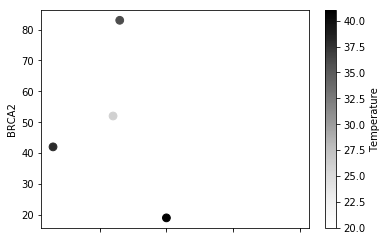

In [103]:
df2 = df
df2['Temperature'] = np.random.randint(20, 60, [5,1])
df2.plot.scatter(x='BRCA1', y='BRCA2', c='Temperature', s=60);

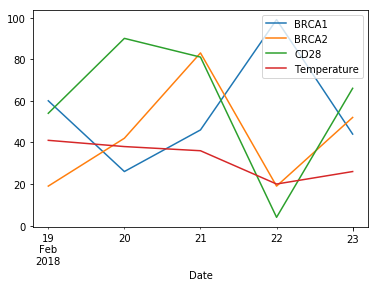

In [104]:
df.plot(x='Date')